In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/placement_simple.csv')

In [31]:
df.shape

(200, 2)

In [32]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


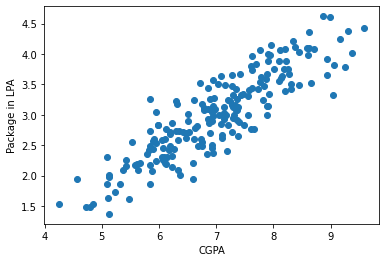

In [34]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')
plt.show()

In [35]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [36]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train

,cgpa
79,7.18
197,7.21
38,8.62
24,6.53
122,5.12
...,...
106,6.13
14,7.73
92,7.90
179,7.14


In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [42]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [43]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

array([2.78031348])

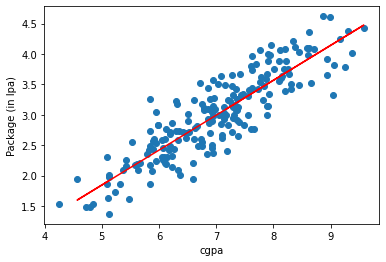

In [46]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('Package (in lpa)')
plt.show()

In [ ]:
#coeffcient(slope of the line)
m = lr.coef_

In [48]:
m

array([0.57425647])

In [ ]:
#intercept (b in the equation) represents the point where the line crosses the y-axis is 0
b = lr.intercept_

In [52]:
# y = mx + b

m * 6.94 + b

array([2.95833298])

In [54]:
y_pred = lr.predict(X_test)

In [58]:
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [60]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,adjusted_rand_score

print("MAE:",mean_absolute_error(y_test,y_pred))

MAE: 0.23150985393278373


In [65]:
print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 0.08417638361329656


In [69]:
print("R2 score:",r2_score(y_test,y_pred))

r2 = r2_score(y_test,y_pred)

R2 score: 0.7730984312051673


$$
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
$$

In [67]:
#adjusted r2 score

X_test.shape

(40, 1)

In [70]:
1- ((1-r2)*(40-1)/(40-1-1))

0.7671273372895138